# Practica de Laboratorio 5

## Nombre y Apellidos : José Santiago Sacón Yanchaguano

## Fecha : 8 de Enero de 2022

## Titulo
Practica acerca de diseño de filtros FIR.



## Tareas a relizar

__NOTA__: En esta practica, el estudiante practicara con programas o scripts en python para la ejecución del diseño de
filtros FIR usando librería Scipy Signal. 



## 1. Diseño de filtros FIR usando el método de Ventanas





### Ventana Kaiser


In [51]:
import dsp as dsp
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [52]:
def ideal_lpf(wc, M):
    alpha = (M-1)/2
    n = np.arange(0,M)
    m = n - alpha
    fc = wc / np.pi
    h = fc * np.sinc(fc*m)
    return h

In [53]:
def freqz_mod(b,a):
    [w, H] = signal.freqz(b,a,1000,'True') 
    H = np.transpose(H[0:501])
    w = np.transpose(w[0:501])
    magH = np.abs(H)
    dB = 20 * np.log10(magH/magH.max())
    phase = np.angle(H)
    grpdelay = signal.group_delay((b,a))
    return dB, phase, grpdelay, w

In [54]:

As=40 
wp = 0.4*np.pi 
ws = 0.5*np.pi
transition = ws - wp 
wc = (ws + wp) / 2 
M = np.ceil(6.6*np.pi/transition)
N = M + 1

<StemContainer object of 3 artists>

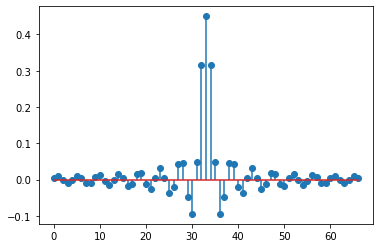

In [55]:

hd=ideal_lpf(wc,N)
plt.stem(hd)

<StemContainer object of 3 artists>

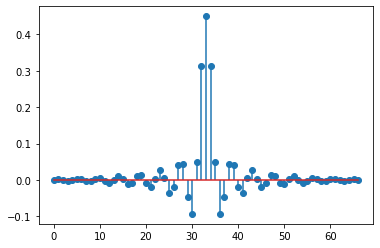

In [59]:

beta = 0.1102*(As-8.7)
window = signal.kaiser(N,beta)
h = window * hd
plt.stem(h)


(0.0, 1.0, -100.0, 10.0)

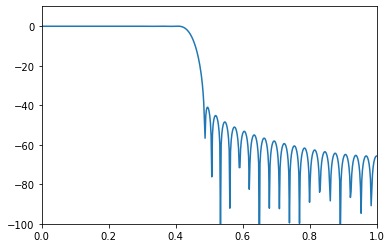

In [60]:

[dB, phase, grpdelay, w]=freqz_mod(h,1)
plt.plot(w/np.pi,dB)
plt.axis([0,1,-100,10])

Text(0, 0.5, 'Fase')

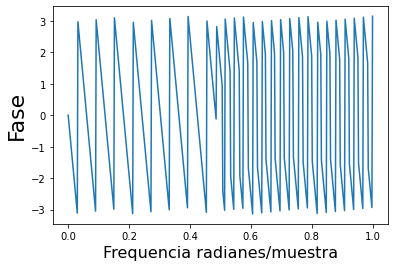

In [79]:
fig,ax = plt.subplots()
ax.plot(w/np.pi,phase)
ax.set_xlabel("Frequencia radianes/muestra",fontsize=16)
ax.set_ylabel(r"Fase",fontsize=22)

In [62]:
delta_w = 2*np.pi/1000;
Rp = -(np.min(dB[1:np.int_(wp/delta_w)+1])) # se obtiene el ripple de passband
print('Ripple de passband ', Rp,' dB')

Ripple de passband  0.1309984175741951  dB


Cumple con las condiciones de Ripple

## 2. Diseño de filtros FIR usando el algoritmo Parks-McClellan

### Filtro pasobanda digital usando algoritmo Parks-McClellan


In [66]:
wp1=0.2*np.pi/2
ws1=0.35*np.pi/2
wc1=(ws1+wp1)/2
transicion1=(ws1-wp1)*2
Rp=1.
As=60.

In [67]:
wp2=0.65*np.pi/2
ws2=0.80*np.pi/2
wc2=(ws2+wp2)/2
transicion2=(ws2-wp2)*2
Rp=1.
As=60.

In [69]:
numtaps = 27
freq_bands = np.array([0, wp1/np.pi, ws1/np.pi, wp2/np.pi, ws2/np.pi, 0.5])
gain = [0,1, 0]
coefficients1 = signal.remez(numtaps, freq_bands, gain )
[dB_op, phase_op, grpdelay_op, wo] = freqz_mod(coefficients1,1)

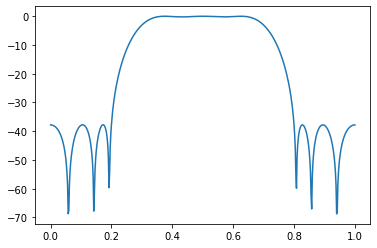

In [70]:
fig,ax = plt.subplots()
ax.plot(wo/np.pi,dB_op)

Notamos que no cumple la condición requerida con N=27

In [72]:
numtaps = 45
freq_bands = np.array([0, wp1/np.pi, ws1/np.pi, wp2/np.pi, ws2/np.pi, 0.5])
gain = [0,1, 0]
coefficients1 = signal.remez(numtaps, freq_bands, gain )
[dB_op, phase_op, grpdelay_op, wo] = freqz_mod(coefficients1,1)

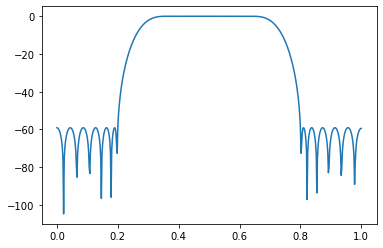

In [73]:
fig,ax = plt.subplots()
ax.plot(wo/np.pi,dB_op)

Notamos que no cumple la condición requerida con N=45

In [74]:
numtaps = 49
freq_bands = np.array([0, wp1/np.pi, ws1/np.pi, wp2/np.pi, ws2/np.pi, 0.5])
gain = [0,1, 0]
coefficients1 = signal.remez(numtaps, freq_bands, gain )
[dB_op, phase_op, grpdelay_op, wo] = freqz_mod(coefficients1,1)

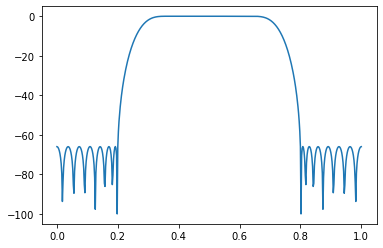

In [76]:
fig,ax = plt.subplots()
ax.plot(wo/np.pi,dB_op)

La condición requeridas en el problema se cumplen con N=49 


In [75]:
delta_w = 2*np.pi/1000; 
Rp = -(np.min(dB_op[np.int_((2*ws1)/delta_w)+1:np.int_(2*wp2/delta_w)+1])) 
print('Ripple de passband ', Rp, ' dB')

Ripple de passband  0.008699641898150801  dB


Cumple con las condiciones de Ripple